In [56]:
# Import needed libraries
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy.special import expit

# Task: Single neuron gradient descent


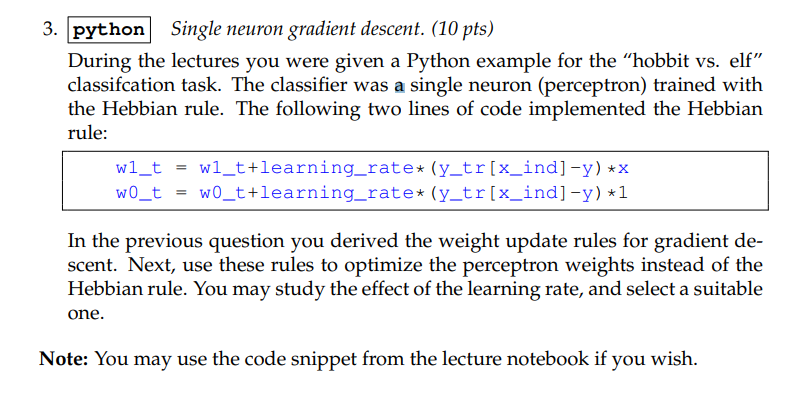

Creating the training data,

In [57]:
# 5 generated data points fron normal distributions
np.random.seed(13)
x_h = np.random.normal(1.1,0.3,5)
x_e = np.random.normal(1.9,0.4,5)

# Assigning suitable given outputs
y_h = np.zeros(x_h.shape)
y_h[:] = 0.0
y_e = np.zeros(x_e.shape)
y_e[:] = +1.0

# Training data points in the same vectors
x_tr = np.concatenate((x_h,x_e))
y_tr = np.concatenate((y_h,y_e))
print(f'The size of x is {x_tr.size}')
print(f'The size of y is {y_tr.size}')

The size of x is 10
The size of y is 10


Let's set the initial weights $w_i^t$ for $t=0$: $w_0^0$ and $w_1^0$.

In [58]:
w0_t = 0
w1_t = 0

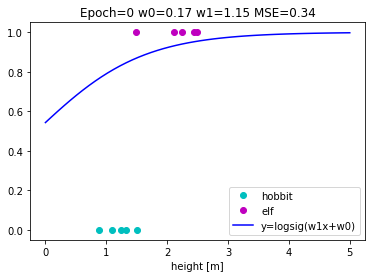

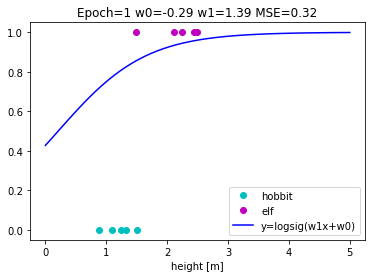

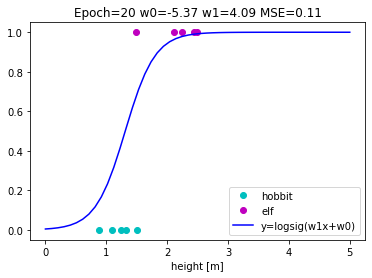

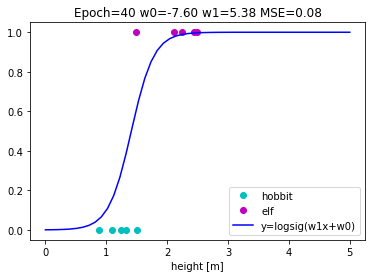

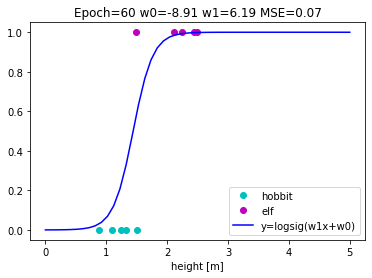

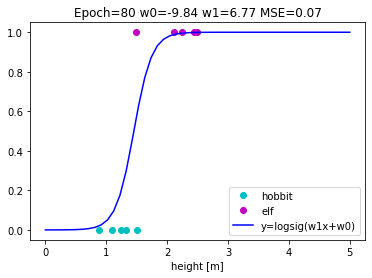

True values y=[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] and predicted values y_pred=[0.02 0.3  0.08 0.19 0.58 0.99 1.   1.   1.   0.55]


In [63]:
# Compute MSE heat map for different a and b
w0_t = 0
w1_t = 0
num_of_epochs = 100
learning_rate = 0.5

for e in range(num_of_epochs):
    for x_index, x in enumerate(x_tr):
        # Gradient descent learning implemented
        y = expit(w1_t*x + w0_t)
        w1_t = w1_t-learning_rate*((-2*x*(y_tr[x_index] - y)) / 2)
        w0_t = w0_t-learning_rate*((-2*(y_tr[x_index] - y)) / 2)

    # Plot every 20th epoch
    if e % 20 == 0 or e == 1:
        y_pred = expit(w1_t*x_tr+w0_t)
        MSE = np.sum((y_tr-y_pred)**2)/(len(y_tr))
        plt.title(f'Epoch={e} w0={w0_t:.2f} w1={w1_t:.2f} MSE={MSE:.2f}')
        plt.plot(x_h,y_h,'co', label="hobbit")
        plt.plot(x_e,y_e,'mo', label="elf")
        x = np.linspace(0.0,+5.0,50)
        plt.plot(x,expit(w1_t*x+w0_t),'b-',label='y=logsig(w1x+w0)')
        plt.xlabel('height [m]')
        plt.legend()
        plt.show()

np.set_printoptions(precision=2)
print(f'True values y={y_tr} and predicted values y_pred={y_pred}')